In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# **# Step 1: Reading the Datasets**

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# **# Step 2: Merging Datasets on 'title' Column**

In [4]:
movies = movies.merge(credits, on='title')

# **# Step 3: Selecting Necessary Columns**

In [5]:
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]
movies

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


# **# Step 4: Checking for Missing Values** **bold text**

In [6]:
movies.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


# **# Step 5: Dropping Rows with Missing Values**

In [7]:
movies.dropna(inplace=True)

# **# Step 6: Function to Extract 'name' from 'genres', 'keywords', and 'cast'**

In [8]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

# **# Step 7: Applying the Convert Function to 'genres' and 'keywords'**

In [9]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)

# **# Step 8: Function to Extract Top 3 Cast Members**

In [10]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter += 1
    return L

# **# Step 9: Applying the Convert3 Function to 'cast'**

In [11]:
movies['cast'] = movies['cast'].apply(convert)
movies['cast'] = movies['cast'].apply(lambda x: x[0:3])


# **# Step 10: Function to Fetch Director from 'crew'**

In [12]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

# **# Step 11: Applying the Fetch Director Function to 'crew'**

In [13]:
movies['crew'] = movies['crew'].apply(fetch_director)

# **# Step 12: Splitting 'overview' into Words**

In [14]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())

# **# Step 13: Function to Remove Spaces from 'cast', 'crew', 'genres', and 'keywords'**

In [15]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ", ""))
    return L1

# **# Step 14: Applying the Collapse Function to 'cast', 'crew', 'genres', and 'keywords'**

In [16]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

# **# Step 15: Creating the 'tags' Column by Combining All Features**

In [17]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

# **# Step 16: Creating a New Dataframe with 'movie_id', 'title', and 'tags'**

In [18]:
new_df = movies[['movie_id', 'title', 'tags']]

# **# Step 17: Converting Lists of Tags into Strings**

In [19]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

<ipython-input-19-e498c0e361a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


# **# Step 18: Displaying the First Few Rows of the New Dataframe**

In [20]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


# **# Step 19: Vectorizing the 'tags' Column Using CountVectorizer**

In [21]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(new_df['tags']).toarray()

# **# Step 20: Checking the Shape of the Vectorized Matrix**

In [22]:
vector.shape

(4806, 5000)

# **# Step 21: Calculating Cosine Similarity Between All Movies**

In [23]:
similarity = cosine_similarity(vector)

# **# Step 22: Function to Recommend Similar Movies Based on Cosine Similarity**

In [29]:
def get_recommendations(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])

    recommended_movies = []
    scores = []

    for i in distances[1:]:
        title = new_df.iloc[i[0]].title
        if title not in recommended_movies:  # Avoid duplicate titles
            recommended_movies.append(title)
            scores.append(similarity[index][i[0]])

        if len(recommended_movies) == 5:  # Stop once we have 5 recommendations
            break

    return recommended_movies, scores

# Get recommended movie titles and their similarity scores for 'Batman Begins'
recommended_movies, scores = get_recommendations('Batman Begins')

# Display the recommendations
for title, score in zip(recommended_movies, scores):
    print(f"{title}: {score}")

The Dark Knight: 0.39386318072168813
The Dark Knight Rises: 0.3572172541558802
Batman: 0.3396831102433787
Batman & Robin: 0.3278050340535929
Amidst the Devil's Wings: 0.2886751345948129


# **# Step 23: Example - Recommending Movies Similar to 'Batman Begins'**

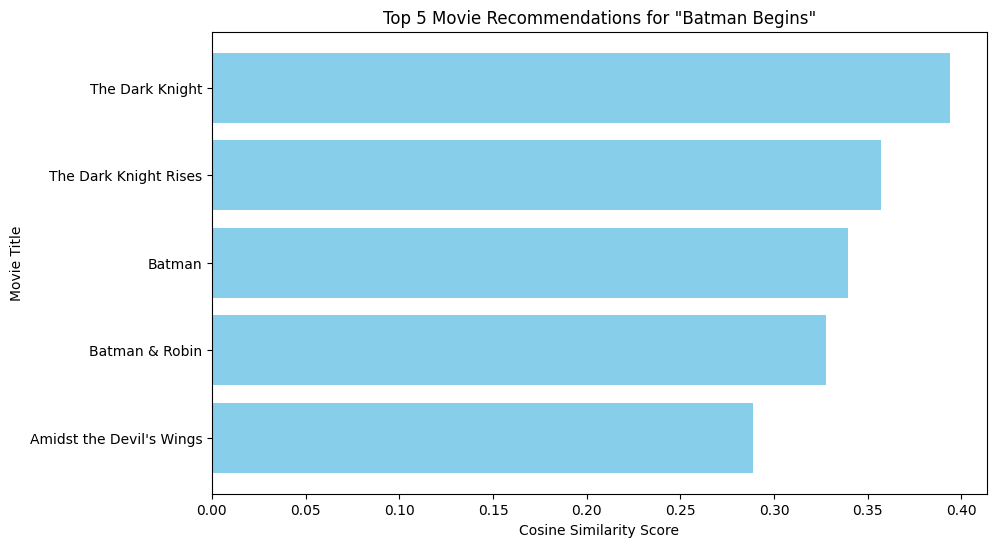

In [31]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(recommended_movies, scores, color='skyblue')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Movie Title')
plt.title('Top 5 Movie Recommendations for "Batman Begins"')
plt.gca().invert_yaxis()  # To display the highest similarity at the top
plt.show()

# **Visualizations**

## **# Visualization 1: Top Genres Distribution**

<ipython-input-29-a25b2f4891ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index[:10], y=genre_count.values[:10], palette="viridis")


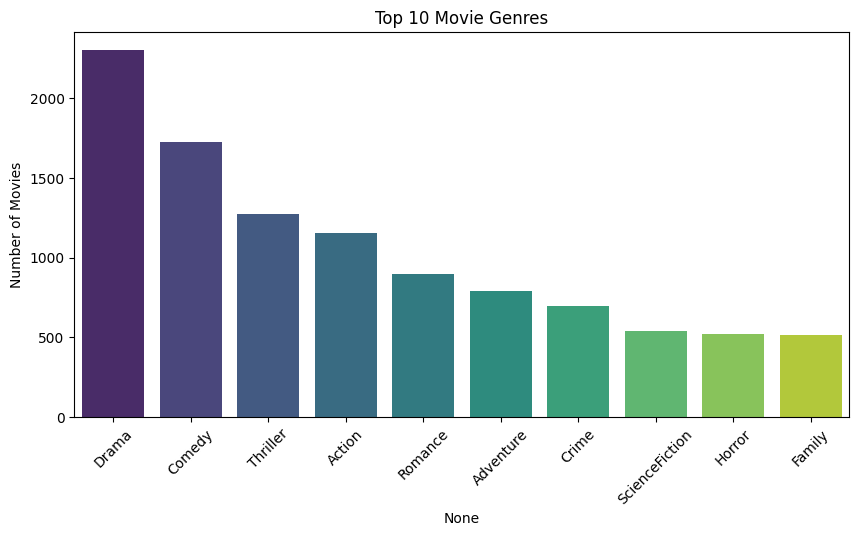

In [29]:
genre_count = pd.Series([genre for sublist in movies['genres'] for genre in sublist]).value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=genre_count.index[:10], y=genre_count.values[:10], palette="viridis")
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.show()

## **# Visualization 2: Top Keywords Distribution**

<ipython-input-30-c569f825c47d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_count.index[:10], y=keyword_count.values[:10], palette="magma")


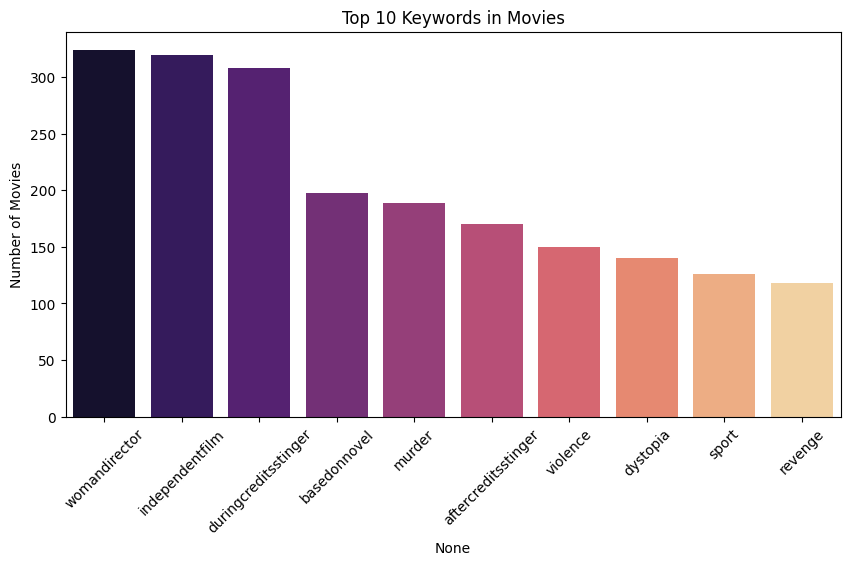

In [30]:
keyword_count = pd.Series([keyword for sublist in movies['keywords'] for keyword in sublist]).value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=keyword_count.index[:10], y=keyword_count.values[:10], palette="magma")
plt.title('Top 10 Keywords in Movies')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.show()

## **# Visualization 3: Top Cast Members Frequency**

<ipython-input-31-50ff2ea28c4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cast_count.index[:10], y=cast_count.values[:10], palette="coolwarm")


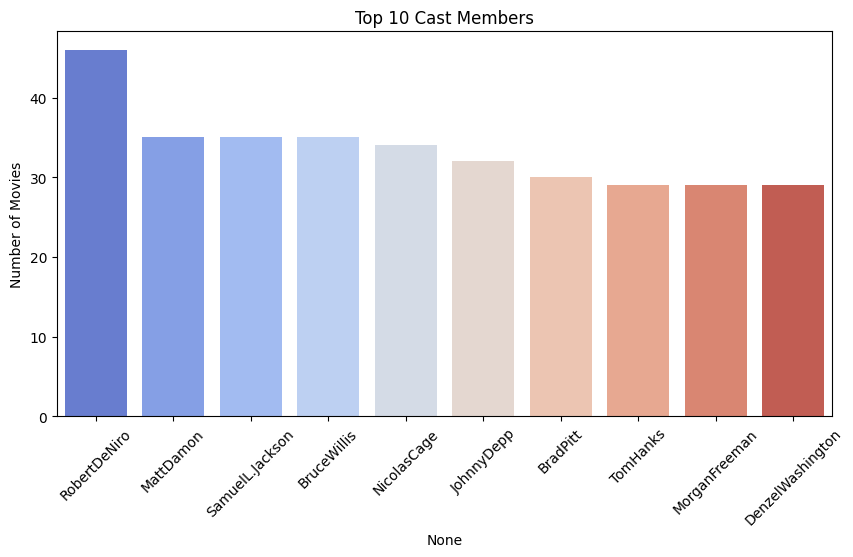

In [31]:
cast_count = pd.Series([actor for sublist in movies['cast'] for actor in sublist]).value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=cast_count.index[:10], y=cast_count.values[:10], palette="coolwarm")
plt.title('Top 10 Cast Members')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.show()

## **# Visualization 4: Top Directors Frequency**

<ipython-input-32-f36ecc9ec445>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_count.index[:10], y=director_count.values[:10], palette="plasma")


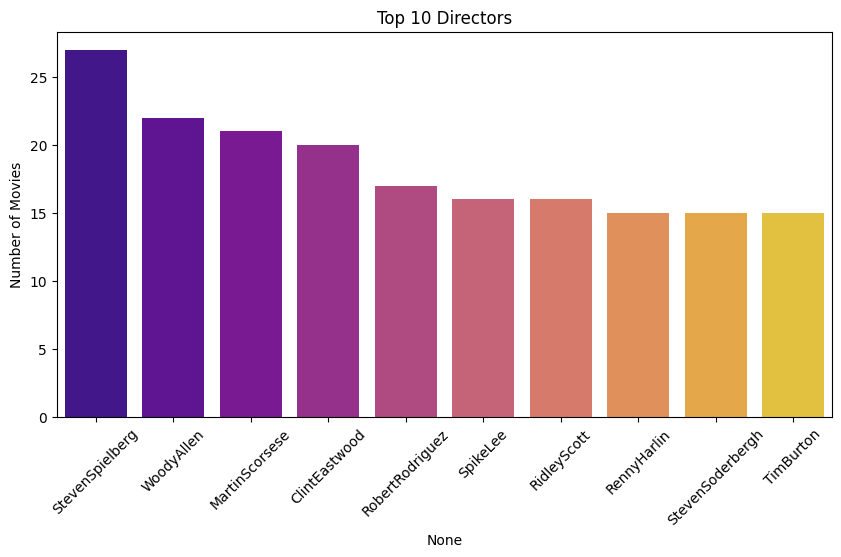

In [32]:
director_count = pd.Series([director for sublist in movies['crew'] for director in sublist]).value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=director_count.index[:10], y=director_count.values[:10], palette="plasma")
plt.title('Top 10 Directors')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.show()

## **# Visualization 5: Cosine Similarity Heatmap (Sample for 10 Movies)**

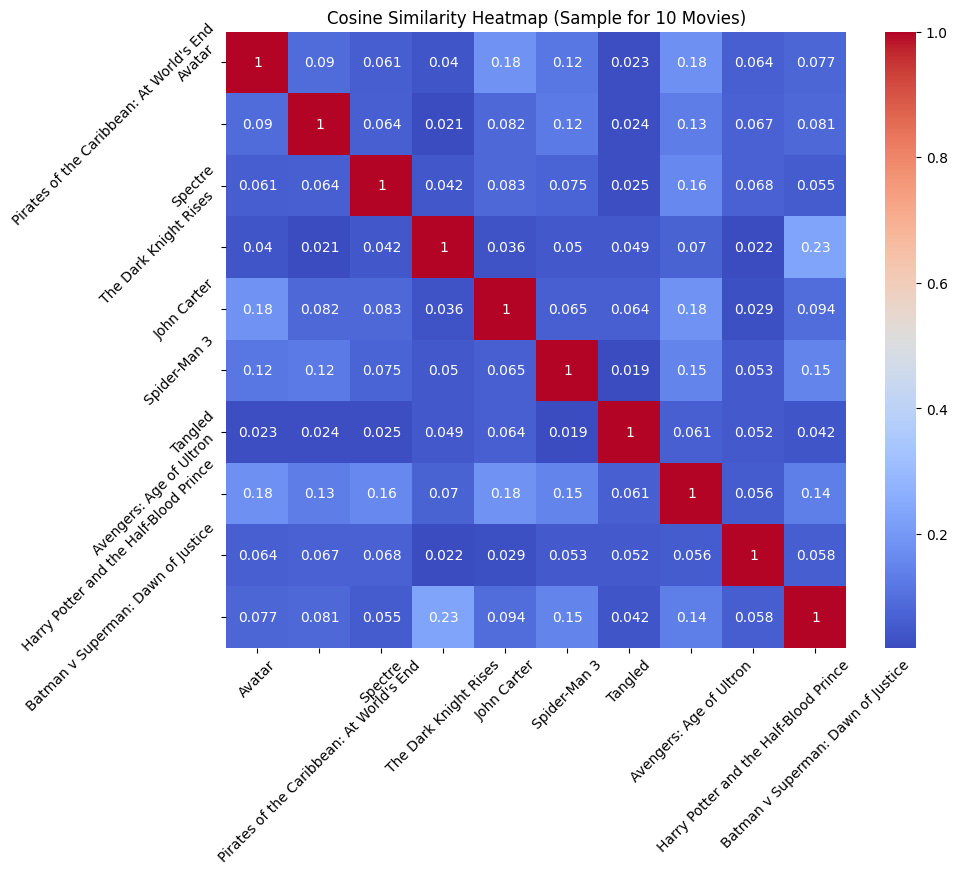

In [33]:
plt.figure(figsize=(10, 8))
sample_similarity = similarity[:10, :10]  # Taking the first 10 movies for simplicity
sns.heatmap(sample_similarity, annot=True, cmap='coolwarm', xticklabels=new_df['title'][:10], yticklabels=new_df['title'][:10])
plt.title('Cosine Similarity Heatmap (Sample for 10 Movies)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()